#### Output1: Characterize the search results in a few sentences.

The chosen keyword is “customer retention”. The search results were sorted by “Most Votes” attribute.

The datasets appeared as a part of search results were mostly based on the information obtained through a Customer availing a product/service. The top results included Black Friday , Telco Customer Churn, Netflix, Ecommerce data.On a broad sense, the data provided in these datasets can be classified into three categories:

Information about the Customer:demographic details,account details,etc..

Information about the Product:Price,Brand,Category,etc..

Information about the customer-product interaction:Reviews,Ratings,Transactions,etc..

These datasets can be used to understand more about the Customer in relation to the product or service availed and use the same to improve the product/service and provide better value to Customers.


#### Output2: Select one of the resulting datasets, and explain your choice in a few sentences.

The chosen dataset is Telco Customer Churn. Recently I was going through profile of few companies on request of my one of my relatives to provide an overview of the work being done from a business as well as technical perspective. As I was going through profile of these companies, I was amazed by the number of use cases of Data Science in the telecom industry and the impact of the successful applications. So when I saw the keyword Telco I have almost instantly went forward to know more details about the dataset and after going through the details and formulating the problem statement, I was sure that this is the dataset to be worked on.

#### Output3: Describe a relevant/interesting problem or question in a few sentences.

## Problem Statement:

* The company is facing high levels of Customer Churn and is projected to take a dip in revenue because of the same. The management becomes concerned about the same and asks the Data Scientist to let them know what needs to be done to reduce the Customer Churn.

##### Output4: Explain your approach to solving the problem.

## Approach:

* For tackling this problem we can look at the Actions to taken or changes need to be made from two different perspectives. Firstly,what are the organisational changes that need to be done to reduce the Customer churn in the future. Secondly, how do we identify the future churn customers and act pro-actively on individual basis.

* So we need to look at data from a high level and find the pattern among the Churned Customers and find out what can be done from a company's perspective to tackle it.

* Secondly, we can build a predictive model to do periodic predictions about the Churn Customers so that Customer representatives can pro-actively call the Customers to know about their concerns if any and make sure they do not abandon the product.

* For the first part, we will visualize the Customer churn against every other attribute of the Customer and try to retrieve inferences based on these patterns(if any) regarding the behavior and possibly suggest what can be done to reduce the churn.

* For the second part, we will construct a machine learning based predictive model and the same will be used in prediction of the Customer churn.

## Results Expected:

* Insights regarding the attributes of Customers which have significant effect on Churn.
* Action plans/Suggestions on what needs to be done on broad level to retain Customers.
* The Customer Churn prediction model.

### Output5: Write code to solve the problem, and show the results. 

## Import Packages

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

import numpy as np

from sklearn.utils import resample

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import CategoricalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neural_network import MLPClassifier

#Scoring and Validating Model
from sklearn.model_selection import cross_val_score

import pickle

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
telco_data=pd.read_csv("Telco-Customer-Churn.csv")

## Examine Data

In [3]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## .info() to check the length and data types

In [4]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Identify target, numerical and categorical variables

In [5]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#Target Variable
target_attrib=["Churn"]

#Numerical Categorical variables 
num_cat_attrib=["SeniorCitizen"]

# Non numeric categorical variables
nonnum_cat_attrib=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity",          
                   "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling",
                   "PaymentMethod"]

# Categorical Variables
cat_attrib=["SeniorCitizen","gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity",          
                   "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling",
                   "PaymentMethod"]

#Quantitative variables
rel_num_attrib=["tenure","MonthlyCharges","TotalCharges"]

## DATA CLEANSING

## Replacing spaces in TotalCharges with NaN.

In [7]:
replaces={" ":np.NaN}
telco_data["TotalCharges"].replace(replaces,inplace=True)
telco_data.TotalCharges=telco_data.TotalCharges.astype("float").copy() 

## Converting Churn to Numerical Variable

In [8]:
replaces={"Yes":1,"No":0}
telco_data["Churn"].replace(replaces,inplace=True)
telco_data.Churn=telco_data.Churn.astype("int").copy() 

## Descriptive Analytics

## Total Number of Customers

In [9]:
telco_data.shape

(7043, 21)

## Total Churn Rate

In [10]:
(telco_data.Churn.value_counts()/telco_data.shape[0])*100

0    73.463013
1    26.536987
Name: Churn, dtype: float64

#### The Churn rate is about 26.5%

## Summarize numerical variables

In [11]:
telco_data.describe(include=[np.number])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


## Summarize categorical variables

In [12]:
telco_data.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,7251-LJBQN,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


## Check for Duplicate Entries

In [13]:
telco_data.duplicated().sum()

0

## Check for Missing Values in Data

In [14]:
telco_data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

## Visualizations

* Let's look at how frequency distribution of the data

## Visualize Target Variable (Churn)

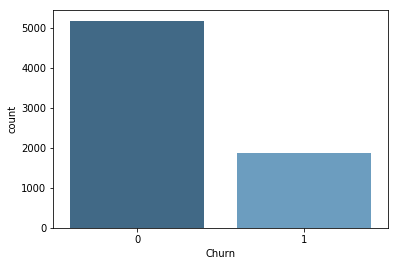

In [15]:
sns.countplot(x="Churn",data=telco_data,palette="Blues_d")
plt.show()

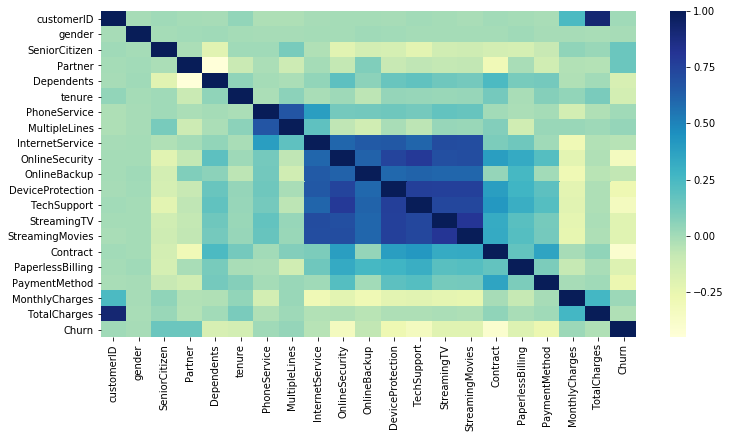

In [16]:
plt.figure(figsize=(12, 6))

corr = telco_data.apply(lambda x: pd.factorize(x)[0]).corr()

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap="YlGnBu")

### HeatMap Analysis:
* From an overall perspective the heatmap shows the correlation between Churn and various other variables but to have an in depth perspective of various relationships let's look at the attributes on an individual basis.

In [17]:
def plot_target_vs_attrib(data,attrib,target,quant=False):
    f,ax=plt.subplots(1,2,figsize=(14,6))
    if quant==True:
        data[attrib].value_counts().sort_index().plot(ax=ax[0])
        sns.boxplot(x=target, y=attrib, data=data,ax=ax[1])
        return
            
    sns.countplot(x=attrib,data=telco_data,ax=ax[0])
    plt.xticks(fontsize=15)
    prop_df = (data[attrib]
           .groupby(data[target])
           .value_counts(normalize=True)
           .rename("count")
           .reset_index())
    sns.barplot(x=attrib, y="count", hue="Churn", data=prop_df,ax=ax[1])
    plt.ylabel("Percentage of Customers",fontsize=15)
    plt.xlabel(attrib,fontsize=13)
    plt.xticks(fontsize=13)

## Gender vs Churn

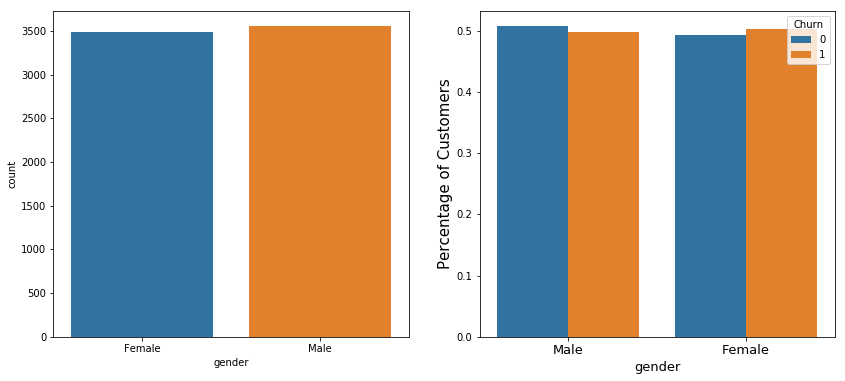

In [18]:
plot_target_vs_attrib(telco_data,"gender","Churn")

## PhoneService vs Churn

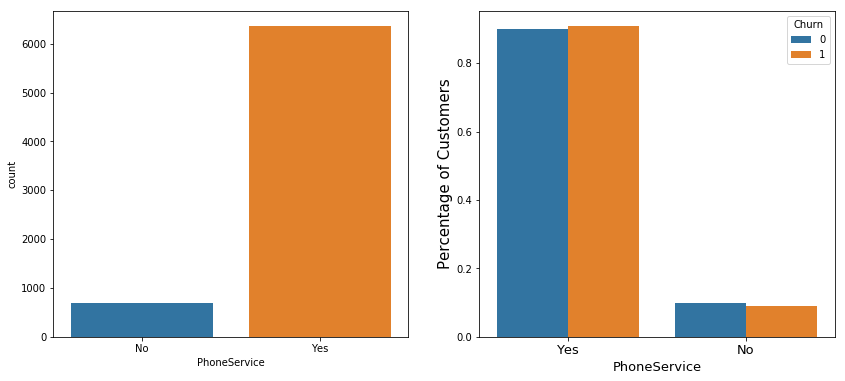

In [19]:
plot_target_vs_attrib(telco_data,"PhoneService","Churn")

## Effect of Gender and PhoneService Attribute on Churn

* From the above plot we can clearly see that whether a Customer is Male or Female has almost no effect on Churn since we can clearly see that the distribution is same for both the genders.

* Similarly, Whether a Customer has a phone service or not has almost no effect on Churn.

* We can drop this attributes during prediction of Churn since it's clear they have very less predictive power and would also help in reduction of dimensionality of the features.

## MultipleLines vs Churn

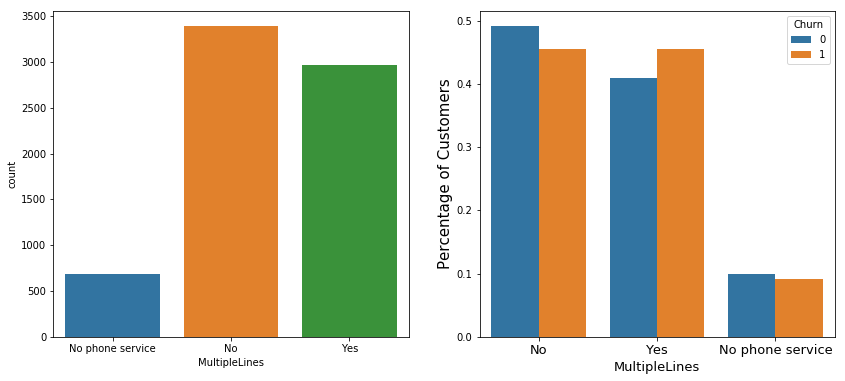

In [20]:
plot_target_vs_attrib(telco_data,"MultipleLines","Churn")

## Effect of MultipleLines on Churn

* For the multiple lines attribute excluding Customers with no phone service which has almost no signficance on Churning of Customer the presence of Multiple lines seems to have very less significance which can be ignored.

## Partner vs Churn

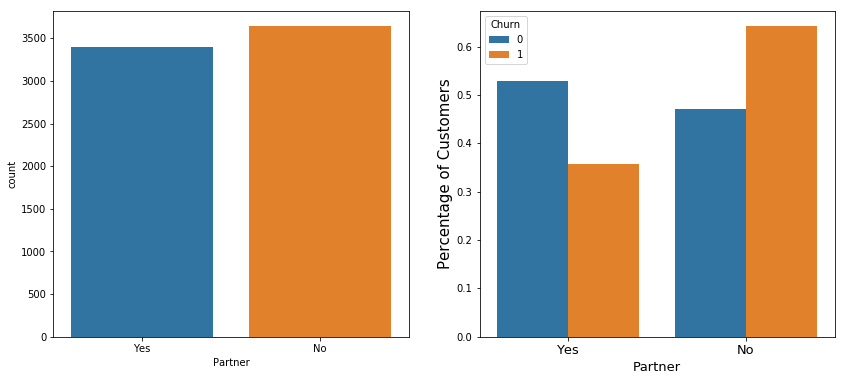

In [21]:
plot_target_vs_attrib(telco_data,"Partner","Churn")

## Dependents vs Churn

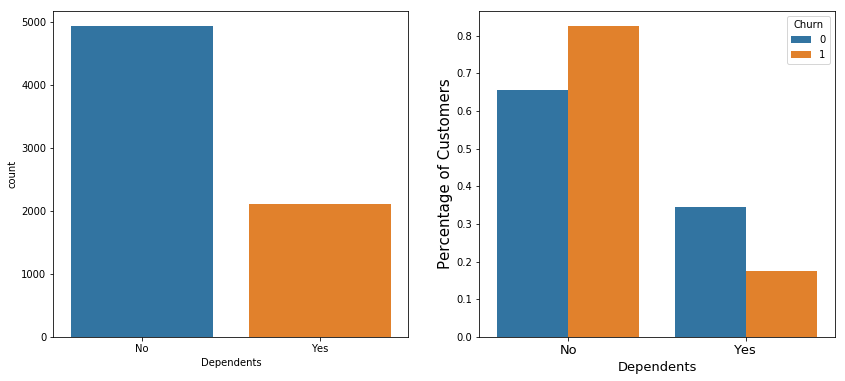

In [22]:
plot_target_vs_attrib(telco_data,"Dependents","Churn")

## Effect of Partner and Dependents Attribute on Churn
* Customers without partner have high probability of being Churned compared to a Customer with partner.

* Customers without dependents have high probability of being churned compared to Customer with dependents.

* These insights would probably help us in identifying the Probable Churn customer but we will not be able to do anything to change the status.

* We may be able to use this insight in Customer acquisition by targetting the new ads at the Potential Customers with partners and dependents.

## InternetService vs Churn

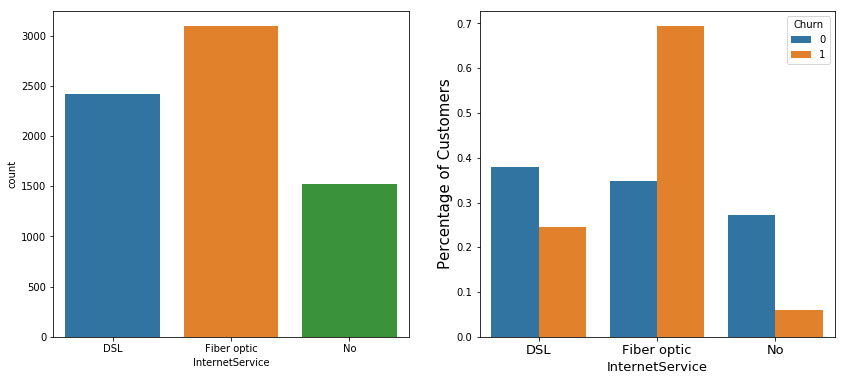

In [23]:
plot_target_vs_attrib(telco_data,"InternetService","Churn")

## Effect of InternetService on Churn

* The presence of Fibre Optic Internet service seems to be a major contributor to churning based on the above observation whereas the Customers with no internet have very less chance of churning.

* The reason seems to be as the internet speeds are getting higher the company has more probability of loosing Customers.

* This observation can be taken up as prima facie to start a detailed investigation to find the exact root cause and work on the improvements that can be made to product as well as the Customer service as the Internet would only expand with higher speeds in future and that would be an almost existential crisis for the company.

## OnlineSecurity vs Churn

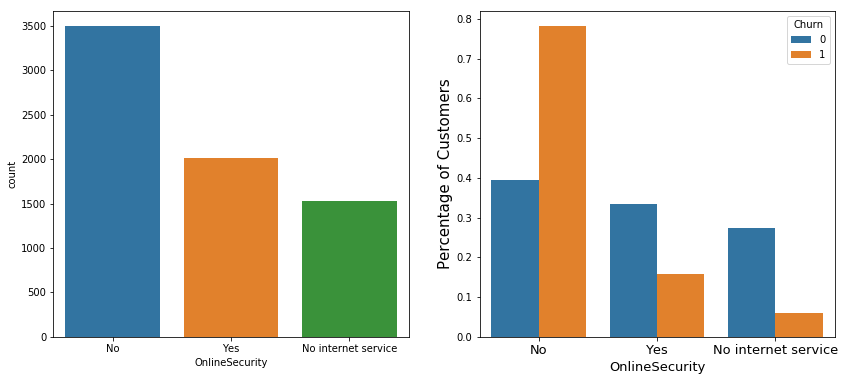

In [24]:
plot_target_vs_attrib(telco_data,"OnlineSecurity","Churn")

## DeviceProtection vs Churn

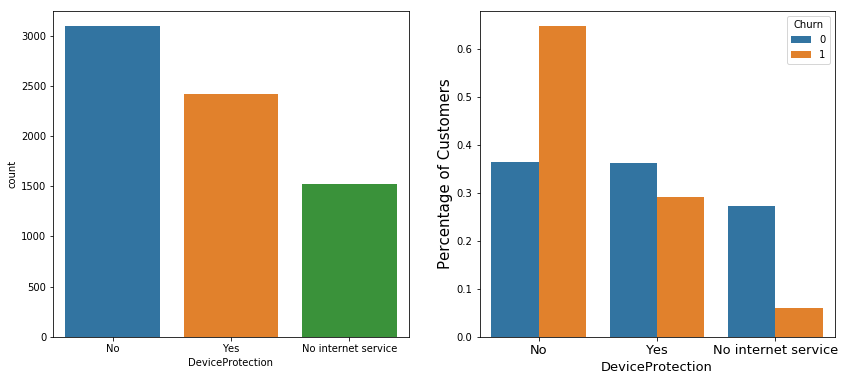

In [25]:
plot_target_vs_attrib(telco_data,"DeviceProtection","Churn")

## TechSupport vs Churn

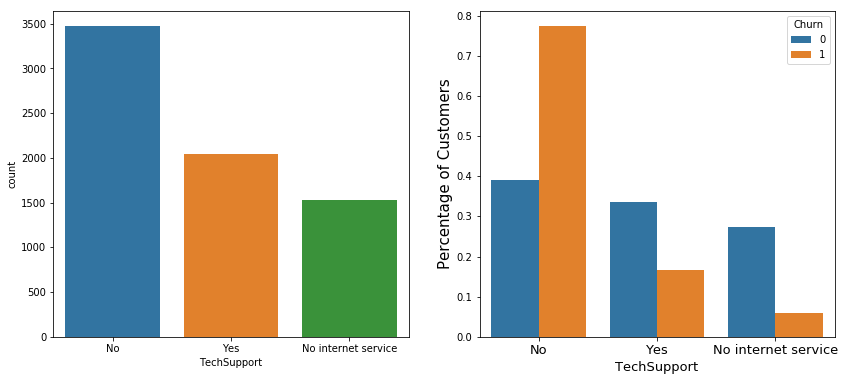

In [26]:
plot_target_vs_attrib(telco_data,"TechSupport","Churn")

## Effect of OnlineSecurity, DeviceProtection and  TechSupport on Churn
* Ignoring the Customers with no internet service which was discussed earlier, Customers with no online security seem to have high probability of being churned compared to Customer with online security.

* Similarly, Customers with no device protection seem to have high probability of being churned compared to Customer with online security.

* Also, Customers with no Techsupport seem to have high probability of being churned compared to Customer with Techsupport.

* This is definitely an issue that can be addressed. Company wide initiative can be taken up to encourage more Customers to have online security, Device protection and Techsupport by enlightening them about advantages.

* This is probably an area where the Company can evaluate investing more funds as this would probably have high favorable impact in the future.

## StreamingTV vs Churn

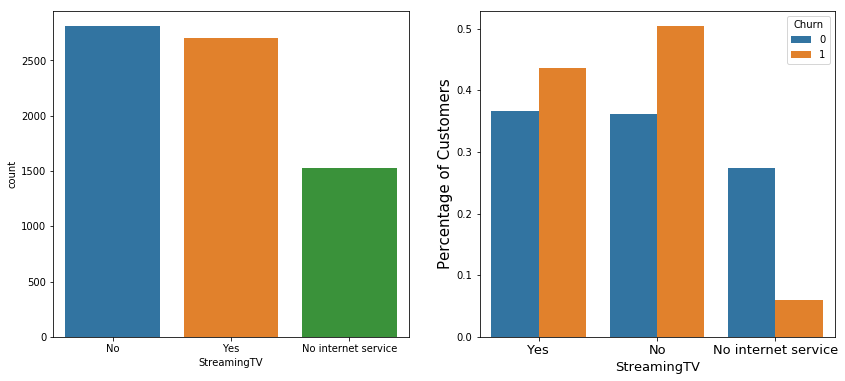

In [27]:
plot_target_vs_attrib(telco_data,"StreamingTV","Churn")

## StreamingMovies vs Churn

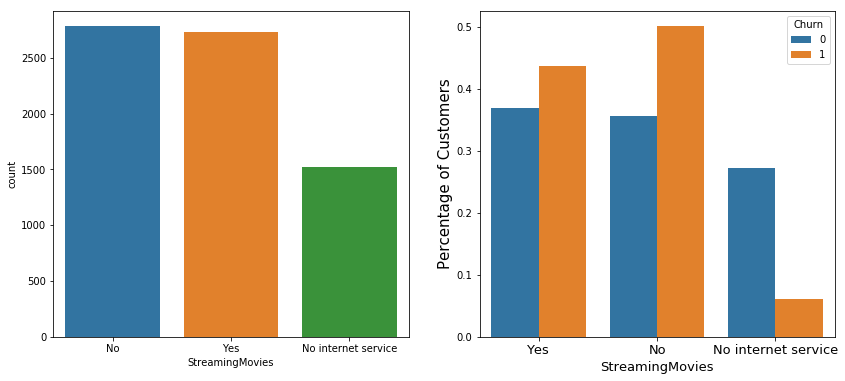

In [28]:
plot_target_vs_attrib(telco_data,"StreamingMovies","Churn")

## Effect of StreamingMovies and StreamingTV on Churn
* Ignoring the Customers with no internet service which was discussed earlier, Customers with no streaming movies have more probability of churning compared to Customers with Streaming Movies feature. The same argument is valid for StreamingTV.

* This is definitely an area where improvements can be done by encouraging more Customers to have StreamingMovies and StreamingTV by offering discounted prices either through partnering with external entity or internally depending on the setup of the company.

## Contract vs Churn

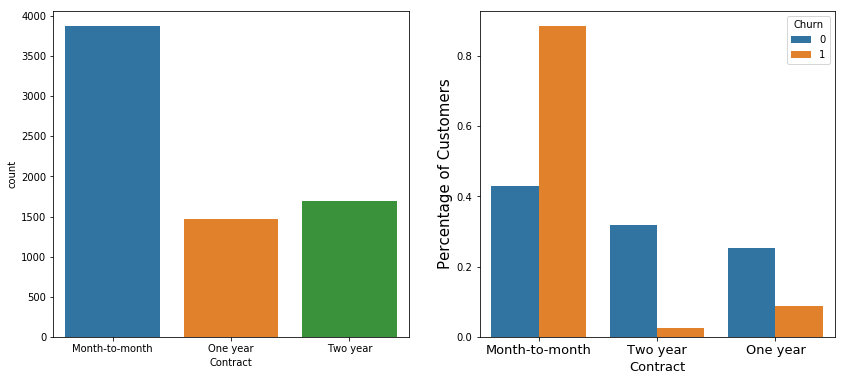

In [29]:
plot_target_vs_attrib(telco_data,"Contract","Churn")

## Effect of Contract on Churn

* Customers with at least one year contract have more probability of continuing as Customers compared to Customers who pay on Monthly basis. Within Customers with at least one year contract the Customers with two years contract have less probability of Churn compared to Customers with one year contract.

* The company can take up an initiative to convert the monthly pay Customers to one year or two year contract customers through lucrative offers. This can be very advantageous to the company due to the impact in long term.

## PaperlessBilling vs Churn

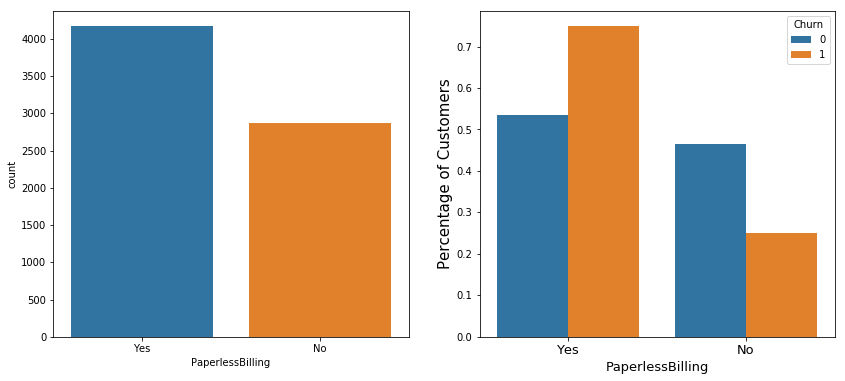

In [30]:
plot_target_vs_attrib(telco_data,"PaperlessBilling","Churn")

## PaymentMethod vs Churn

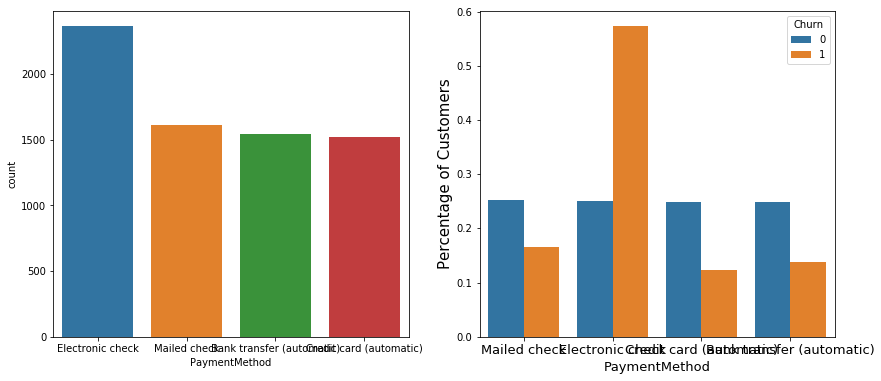

In [31]:
plot_target_vs_attrib(telco_data,"PaymentMethod","Churn")

## Effect of PaperlessBilling and PaymentMethod on Churn
* The Customers with paperless billing have high probability of turning into Churned customers compared to Customers with no paperless billing.

* The Customer with electronic check as payment method have high probability of becoming a churned Customer. 

* Here the Customers with automatic payment methods have less probability of turning into churned Customers. The company can encourage more customers to adopt one of the automatic payment methods available through probably emphasing about the time saved due to automation of the payments.

## SeniorCitizen vs Churn

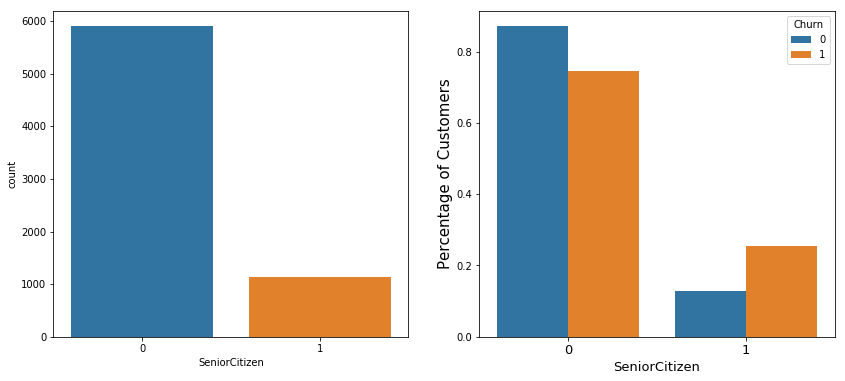

In [32]:
plot_target_vs_attrib(telco_data,"SeniorCitizen","Churn")

## Effect of SeniorCitizen on Churn

* The Customers who are Senior citizens have high probability of becoming a churned customer compared to the Customers who are not senior citizens.

* We cannot know the root cause based on the above observation so the company can decide on dedicating few resources to identify the root cause to why the senior citizens are more probable to churn and take actions accordingly.

## Tenure vs Churn

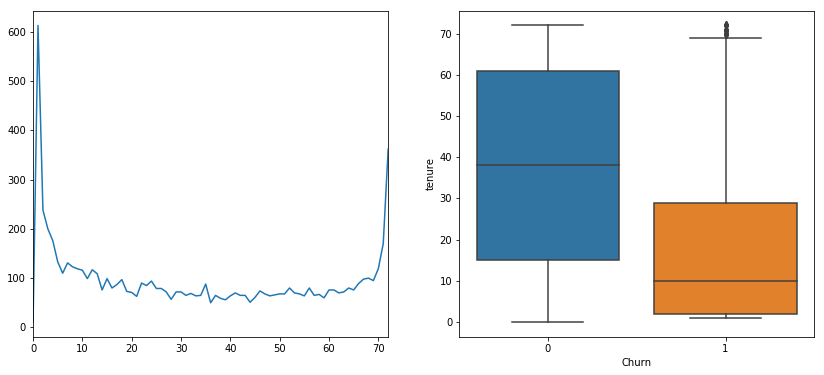

In [33]:
plot_target_vs_attrib(telco_data,"tenure","Churn",quant=True)

## MonthlyCharges vs Churn

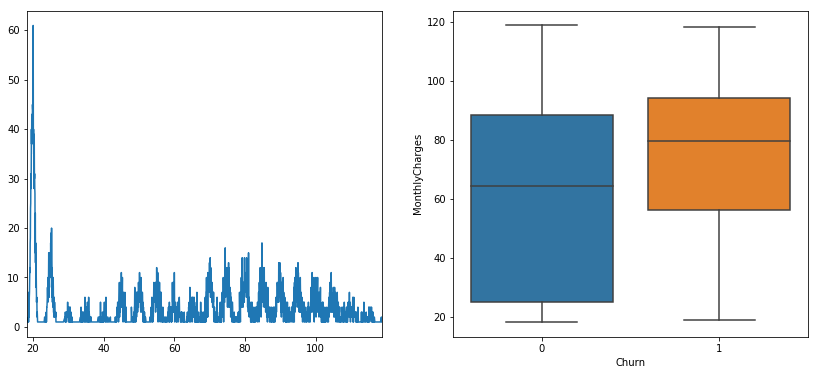

In [34]:
plot_target_vs_attrib(telco_data,"MonthlyCharges","Churn",quant=True)

## TotalCharges vs Churn

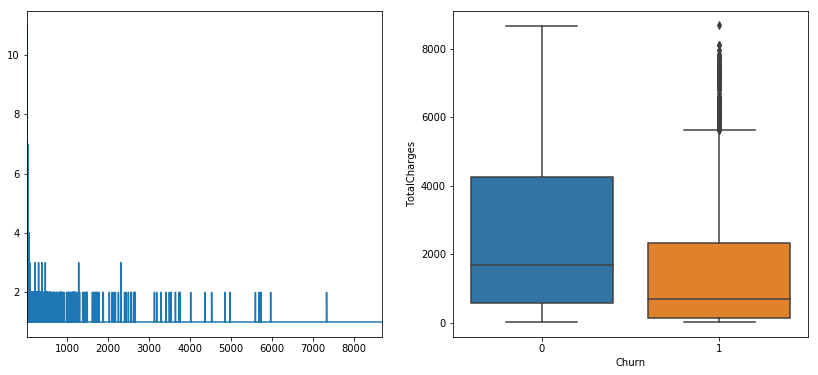

In [35]:
plot_target_vs_attrib(telco_data,"TotalCharges","Churn",quant=True)

## Effect of Tenure, MonthlyCharges and TotalCharges on Churn

* The Customers with higher tenure seem to have low probability of turning into churn Customers. This is fairly expected as Customers who tend to use a service or product for a longer period of time tend to become more loyal Customers and not leave the company. There are few outliers challenging this trend but they can be ignored as anamolies.

* The Non Churn Customers have high total charges, probably because the Customers stay for a longer period of time and so the total charges are high for them. There are few outliers where Customers with high charges have turned into Churn Customers.

* Customers with high monthly charges seem to have more probability of churning compared to the other Customers.Company may examine the current tarrifs and check if any tariff reductions can be reduced to retain the Customers.

## Metric of Choice For Optimization:
* We need to make sure that we identify maximum Customers who will churn in future. On the other hand if we have false positive that would probably does not do any damage as extra cate generally does not hurt any Customer.

* So we need to minimize false negatives. So the best metric to optimize here is Recall as maximizing the recall minimizes the false negatives.

## Training Phase:

** Stratified Sampling:** 
* The population is divided into homogenuous sub groups called strata and the right number of sample from each sub group is selected in way so that it is representative of the overall population. 

In [36]:
def get_train_test_splits(data,target):
    split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
    for train_index,test_index in split.split(data,data[target]):
        data_train=data.loc[train_index]
        data_test=data.loc[test_index]
    return data_train,data_test

In [37]:
telco_train_data,telco_test_data=get_train_test_splits(telco_data,"Churn")

In [38]:
telco_train_data["Churn"].value_counts()/len(telco_train_data)

0    0.734647
1    0.265353
Name: Churn, dtype: float64

## Resampling the Data to Tackle Imbalanced Classes

* Let's resample the data to upsample the class(No) with lesser instances to equal the class(Yes) with higher number of instances.

In [39]:
def resample_data(data,target,low_count_split_value,high_count_split_value):
    data_split_1=data[data[target]==high_count_split_value]
    data_split_2=data[data[target]==low_count_split_value]
    data_split_2_upsampled=resample(data_split_2,replace=True,n_samples=len(data_split_1),random_state=42)
    data_upsampled=pd.concat([data_split_1,data_split_2_upsampled]).copy()
    return data_upsampled;

In [40]:
telco_train_data=resample_data(telco_train_data,"Churn",1,0)

In [41]:
telco_train_data["Churn"].value_counts()/len(telco_train_data)

1    0.5
0    0.5
Name: Churn, dtype: float64

### DataPipeline
* We have already partitioned the features into three different types of data namely numerical categorical,non-numerical categorical and quantitative to pass them through different datapipelines.

** Custom Transformers **
* These transformers need to seamless integrate with sklearn pipeline for better execution of code
* So need to create a class which has three methods: fit(),transform() , fit_transform()
* By adding TransformerMixin as base class we can bypass fit_transform() function
* By adding BaseEstimator as base class we will get two extra methods get_params() and set_params() for tuning hyper parameters

In [42]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataframeSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names,retain=False):
        self.attribute_names=attribute_names
        self.retain=retain
    def fit(self,a=None):
        return self
    def transform(self,dataframe):
        if(self.retain):
            return dataframe[self.attribute_names]
        else:
            return dataframe[self.attribute_names].values

In [43]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import LabelEncoder
class MultiColLabelEncoder(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,y=None):
        return self
    def transform(self,X):
        for attr in list(X):
            X[attr]=LabelEncoder().fit_transform(X[attr])
        return X.values

** Imputer**
* Scikit Learn Class to take care of missing values
* This involves creation of imputer class based on a strategy for instance "median"
* Then we take the current data frame and drop all non numeric values
* Then the imputer instance is fit on this modified data
* Now the statistics_ variable will be array containing the strategy values for each column which can be later used on
  current missing values or otherwise.

** Pipeline **
* Sklearn provides pipeline as a means to apply different estimators/transformers in a serialized manner.
* All but the last one must be transformers i.e they must have fit_transform() method

**Feature Union**
* This helps in getting together the pipelines for categorical attributes and numerical attributes into single entity

In [44]:
class FeaturePipeline(BaseEstimator,TransformerMixin):
    def __init__(self,rel_num_attrib,num_cat_attrib,nonnum_cat_attrib):
        num_pipeline=Pipeline([("selector",DataframeSelector(rel_num_attrib)),
                                ("imputer",Imputer(strategy="median")),
                               ("scaler",StandardScaler()),
                               ])
        cat_pipeline=Pipeline([("selector",DataframeSelector(num_cat_attrib)),
                       ("imputer",Imputer(strategy="most_frequent")),
                        ("encoder",OneHotEncoder())])
        nonum_cat_pipeline=Pipeline([("selector",DataframeSelector(nonnum_cat_attrib,retain=True)),
                       ("multicolencoder",MultiColLabelEncoder()),
                       ("imputer",Imputer(strategy="most_frequent")),
                        ("encoder",OneHotEncoder())])
        full_pipeline=FeatureUnion(transformer_list=[("num_pipeline",num_pipeline),
                                             ("cat_pipeline",cat_pipeline),
                                            ("nonum_cat_pipeline",nonum_cat_pipeline)
                                            ])
        self.full_pipeline=full_pipeline
    def fit(self,y):
        return self.full_pipeline.fit(y)
    def transform(self,X):
        return self.full_pipeline.transform(X)

## DataChef:

* This class is used to cook the data in the sense it takes the raw data and returns the data in a form which can be fed to Machine Learning Algorithms.

In [45]:
class DataChef():
    def __init__(self,feature_pipeline):
        self.feature_pipeline=feature_pipeline
    def cook_data(self,data,target_attrib,train=True):
        if(train):
            data_features=feature_pipeline.fit_transform(data).copy()
            data_labels=data[target_attrib].copy()
            return data_features,data_labels
        else:
            data_features=feature_pipeline.transform(data).copy()
            data_labels=data[target_attrib].copy()
            return data_features,data_labels

### Preparation Of Input Data

In [46]:
feature_pipeline=FeaturePipeline(rel_num_attrib,num_cat_attrib,nonnum_cat_attrib)

In [47]:
data_chef=DataChef(feature_pipeline)
telco_train_data_prepared,telco_train_labels=data_chef.cook_data(telco_train_data,target_attrib)
telco_test_data_prepared,telco_test_labels=data_chef.cook_data(telco_test_data,target_attrib,train=False)

## Models Explorer:

* This class uses cross validation techniques to validate few machine learning models based on recall and visualize the results to better understand the same.

## Models Exploration

In [48]:
class ModelsExplorer():
    def __init__(self,features,labels):
        self.features=features
        self.labels=labels
        
    def get_cross_val_results(self,ml_algo,features,labels):
        model=ml_algo
        cross_val_results=cross_val_score(model,features,labels,cv=5,scoring="recall",verbose=1)
        return cross_val_results
        
    def explore(self):
        models={"logistic_regression":LogisticRegression(random_state=42),
       "random_forest":RandomForestClassifier(random_state=42),
        "k_neighbors":KNeighborsClassifier(),"supportvector_machine":SVC(random_state=42)}
        results={}
        for key,value in models.items():
            cross_val_results=self.get_cross_val_results(value,self.features,self.labels)
            results[key]=np.mean(cross_val_results)
        self.results=results
        return results
    
    def visualize_explorations(self):
        self.results=dict(sorted(self.results.items(), key=lambda kv: kv[1]))
        plt.barh(range(len(self.results)), list(np.array(list(self.results.values()))*100), align='center')
        plt.yticks(range(len(self.results)), list(self.results.keys()),fontsize=15)
        plt.xticks(range(0,100,5),fontsize=10)
        plt.xlabel("Recall")
        plt.show()

In [49]:
models_explorer=ModelsExplorer(telco_train_data_prepared,telco_train_labels)
results=models_explorer.explore()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.1s finished


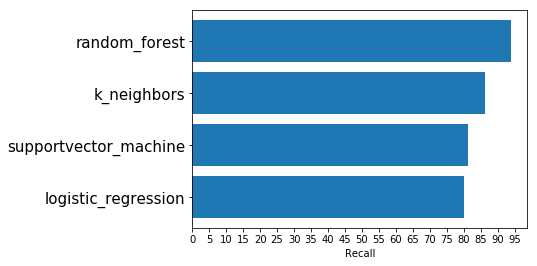

In [50]:
models_explorer.visualize_explorations()

### Ensemble of Classifiers

* We are going with an ensemble of classifiers instead of tuning any particular classifier so that the model is more generalizable.

* To build an ensemble we need to choose a few classifiers out of the classifiers evaluated above.

* Firstly, let's discard Random Forest classifier since it generally overfits the data and it seems to follow similar pattern here.

* The K_Neighbors, support vector machine and logistic regression can be chosen to be part of the ensemble.

In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score,classification_report

ensem_clf=VotingClassifier(estimators=[('knn_clf',KNeighborsClassifier()),("supportvector_machine",SVC(random_state=42)),('lr_clf',LogisticRegression())],voting='hard')

cross_val_results=cross_val_score(ensem_clf,telco_train_data_prepared,telco_train_labels,cv=5,scoring="recall",verbose=1)
#print(cross_val_results)
print("The Recall using 5 Fold Cross validation on train data is ",np.mean(cross_val_results)*100)
#print(np.std(cross_val_results)*100)

ensem_clf.fit(telco_train_data_prepared,telco_train_labels)

filehandler = open("Churn_Predictor.obj","wb")
pickle.dump(ensem_clf,filehandler)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.0s finished


The Recall using 5 Fold Cross validation on train data is  81.92839493191735


## Test Results:

In [55]:
file = open("Churn_Predictor.obj",'rb')
pickle.load(file)
test_results=ensem_clf.predict(telco_test_data_prepared)
print("Test Recall score:",recall_score(telco_test_labels,test_results)*100)

Test Recall score: 77.80748663101605


## Expected Recall in Real World Deployment: 77% 

### Output6: Discuss what you found.

* One of the observations tells us that as the Customer’s internet speed is getting higher the probability of the Customer to churn is increasing.

* This observation can be taken up as prima facie to start a detailed investigation to find the exact root cause and work on the improvements that can be made to product as well as the Customer service as the Internet would only expand with higher speeds in future and that would be an existential crisis for the company.

* Customers with no online security or no device protection or no Techsupport seemed to have high probability of being churned compared to Customer with online security.

* Company wide initiative can be taken up to encourage more Customers to have online security, Device protection and Techsupport by enlightening them about advantages. This is probably an area where the Company can evaluate investing more funds as this would probably have high favorable impact in the future.

* Customers with no streaming movies have more probability of churning compared to Customers with Streaming Movies feature. The same argument is valid for customers with StreamingTV.

* Customers should be encouraged to have StreamingMovies and StreamingTV by offering discounted prices either through partnering with external entity or internally depending on the setup of the company.

* Customers with at least one year contract have more probability of continuing as Customers compared to Customers who pay on Monthly basis. 

* The company can take up an initiative to convert the monthly pay Customers to one year or two year contract customers through lucrative offers. This can be very advantageous to the company due to the impact in long term.

* The Customers with automatic payment methods have less probability of turning into churned Customers. 

* The company should encourage more customers to adopt one of the automatic payment methods available through probably emphasizing about the time saved due to automation of the payments

* The Customer churn predictor is built with an objective to maximize recall.

* This can be deployed in real world and can be used periodically to predict the Churn Customers so that Customer service can get involved on an individual basis to act proactively and retain the Customers.

* From the tests conducted, we estimate the recall would be 76% during real time deployment.